In [1]:
#Import libraries

import pandas as pd  # For handling data
import numpy as np   # For numerical operations
import matplotlib.pyplot as plt  # For graphs
import seaborn as sns  # For prettier graphs

from sklearn.model_selection import train_test_split  # To split data
from sklearn.preprocessing import StandardScaler  # To scale features
from sklearn.linear_model import LogisticRegression  # ML model
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report  # To evaluate model


In [5]:
# Load the Dataset
df = pd.read_csv("diabetes.xls - diabetes.csv") 
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
# understand the data
df.info()       # Shows column names, data types, missing values
df.describe()   # Summary stats like mean, min, max
df.isnull().sum()  # Check if any missing values are present


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

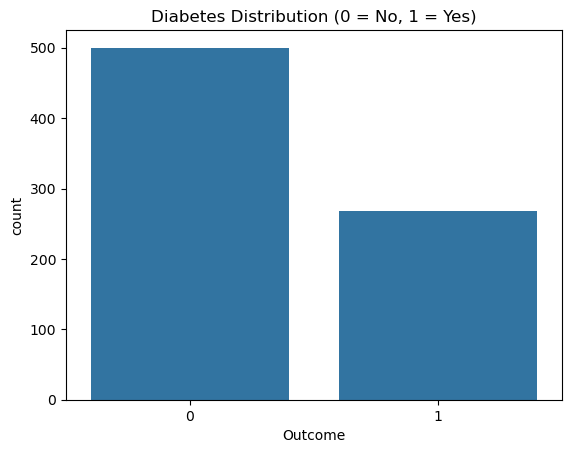

In [7]:
#Visualize the data
sns.countplot(x='Outcome', data=df)
plt.title("Diabetes Distribution (0 = No, 1 = Yes)")
plt.show()


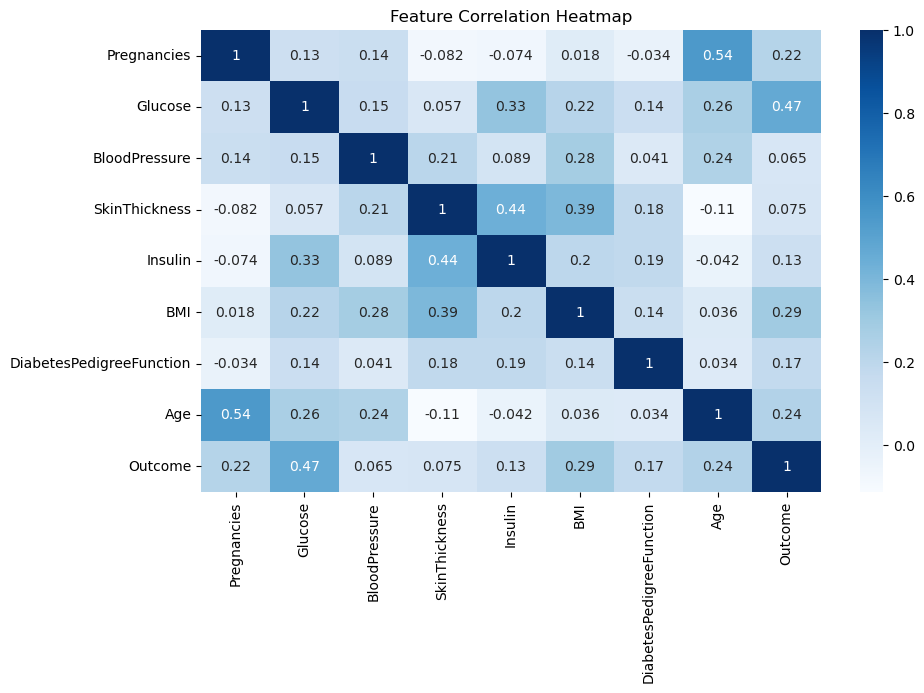

In [8]:
#See Feature Correlations
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.title("Feature Correlation Heatmap")
plt.show()


In [9]:
#Split Features (X) and Target (y)
X = df.drop("Outcome", axis=1)  # All columns except "Outcome"
y = df["Outcome"]               # The target column (0 or 1)


In [10]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
# Scale the Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [12]:
#Train the Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [13]:
#Make Predictions
y_pred = model.predict(X_test)


In [14]:
# Evaluate the model
print("✅ Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n✅ Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\n✅ Classification Report:\n", classification_report(y_test, y_pred))


✅ Accuracy Score: 0.7532467532467533

✅ Confusion Matrix:
 [[79 20]
 [18 37]]

✅ Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



In [16]:
# predicting on new patients data
new_data = pd.DataFrame([[5, 116, 74, 0, 0, 25.6, 0.201, 30]],
                        columns=X.columns)

# Scale and predict
new_data_scaled = scaler.transform(new_data)
result = model.predict(new_data_scaled)

print("Prediction:", "Diabetic" if result[0] == 1 else "Not Diabetic")


Prediction: Not Diabetic
